RIDGE REGRESSION MODEL ANALYSIS FOR CAR DATASET

1. DATA PREPARATION
----------------------------------------
Dataset Shape: (550, 41)
Number of Features Selected: 28
Target Variable: city_mpg
Missing Values in Target: 0
Training Set: (440, 28)
Testing Set: (110, 28)

2. RIDGE REGRESSION MODEL TRAINING
----------------------------------------

3. MODEL PERFORMANCE EVALUATION
----------------------------------------
TRAINING SET PERFORMANCE:
  R² Score: 0.9996
  MSE: 0.0334
  RMSE: 0.1827
  MAE: 0.1443

TEST SET PERFORMANCE:
  R² Score: 0.9982
  MSE: 0.0479
  RMSE: 0.2189
  MAE: 0.1777

Overfitting Check (Train R² - Test R²): 0.0014

4. COEFFICIENT ANALYSIS
----------------------------------------
Top 10 Most Important Features (by absolute coefficient value):
               Feature  Coefficient  Abs_Coefficient
       city_mpg_scaled     5.328681         5.328681
       combination_mpg     0.484501         0.484501
           highway_mpg    -0.137803         0.137803
   is_high_perform

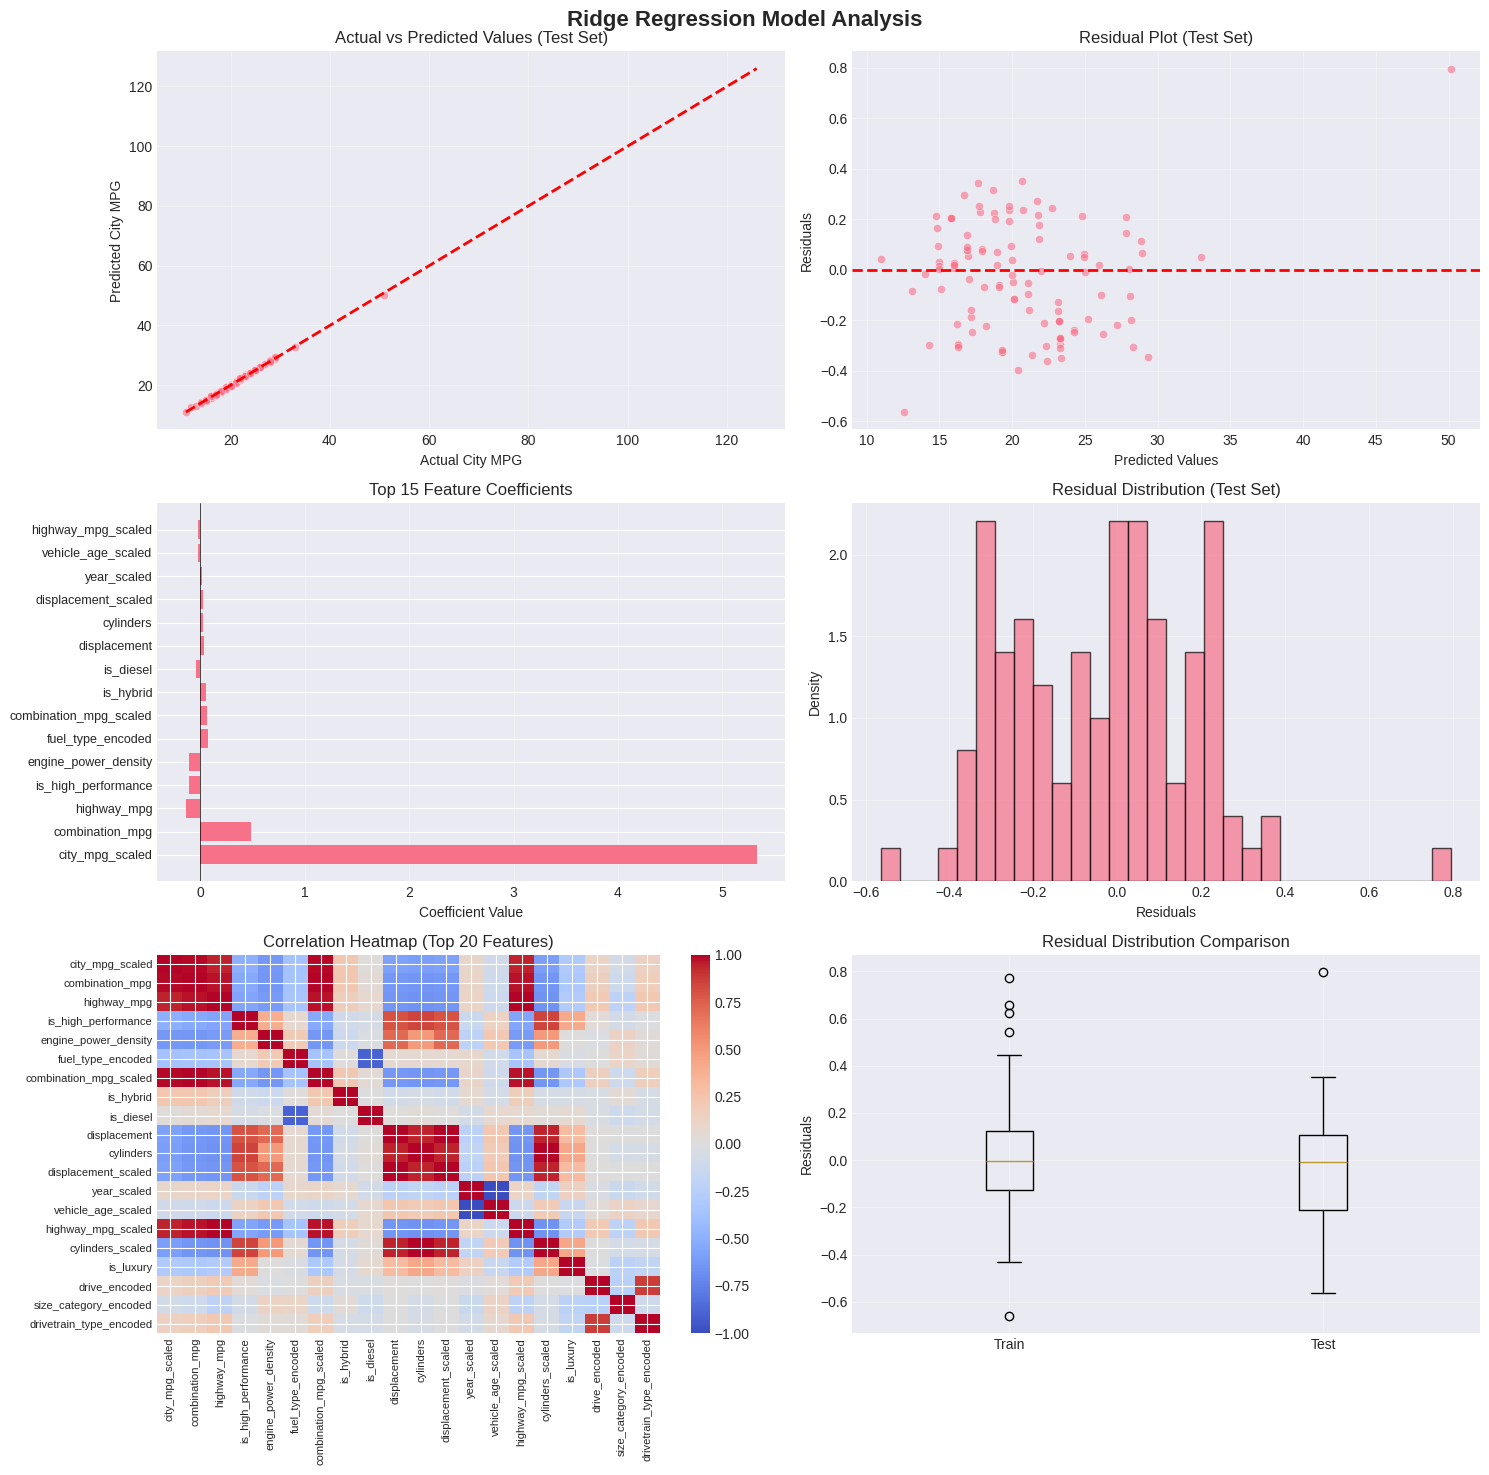

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the dataset from provided content
data = pd.read_csv('Car Data P.csv')

print("=" * 80)
print("RIDGE REGRESSION MODEL ANALYSIS FOR CAR DATASET")
print("=" * 80)

# 1. DATA PREPARATION
print("\n1. DATA PREPARATION")
print("-" * 40)

# Define target and features
# Let's predict city_mpg (city miles per gallon) as it's a key performance metric
target = 'city_mpg'

# Remove target-related columns and non-numeric/encoded columns
exclude_cols = ['city_mpg', 'make', 'model', 'year', 'class', 'drive', 'fuel_type',
                'transmission', 'size_category', 'drivetrain_type', 'fuel_efficiency_category',
                'mpg_diff', 'vehicle_age']  # vehicle_age is derived from year

# Select numeric features
numeric_features = [col for col in data.columns if col not in exclude_cols and
                   (data[col].dtype in ['int64', 'float64'] or '_scaled' in col or
                    '_encoded' in col)]

# Check for missing values
print(f"Dataset Shape: {data.shape}")
print(f"Number of Features Selected: {len(numeric_features)}")
print(f"Target Variable: {target}")
print(f"Missing Values in Target: {data[target].isnull().sum()}")

# Prepare X and y
X = data[numeric_features]
y = data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")

# 2. MODEL TRAINING
print("\n2. RIDGE REGRESSION MODEL TRAINING")
print("-" * 40)

# Initialize and train Ridge model
ridge_model = Ridge(alpha=1.0, random_state=42, max_iter=10000)
ridge_model.fit(X_train, y_train)

# 3. MODEL EVALUATION
print("\n3. MODEL PERFORMANCE EVALUATION")
print("-" * 40)

# Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("TRAINING SET PERFORMANCE:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")

print("\nTEST SET PERFORMANCE:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")

print(f"\nOverfitting Check (Train R² - Test R²): {train_r2 - test_r2:.4f}")

# 4. COEFFICIENT ANALYSIS
print("\n4. COEFFICIENT ANALYSIS")
print("-" * 40)

# Get coefficients
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

# Create coefficient DataFrame
coef_df = pd.DataFrame({
    'Feature': numeric_features,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("Top 10 Most Important Features (by absolute coefficient value):")
print(coef_df.head(10).to_string(index=False))

print(f"\nModel Intercept: {intercept:.4f}")

# 5. RESIDUAL ANALYSIS
print("\n5. RESIDUAL ANALYSIS")
print("-" * 40)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Statistical analysis of residuals
print("Training Set Residuals:")
print(f"  Mean: {train_residuals.mean():.4f}")
print(f"  Std: {train_residuals.std():.4f}")
print(f"  Min: {train_residuals.min():.4f}")
print(f"  Max: {train_residuals.max():.4f}")

print("\nTest Set Residuals:")
print(f"  Mean: {test_residuals.mean():.4f}")
print(f"  Std: {test_residuals.std():.4f}")
print(f"  Min: {test_residuals.min():.4f}")
print(f"  Max: {test_residuals.max():.4f}")

# 6. ADVANCED ANALYSIS
print("\n6. ADVANCED ANALYSIS")
print("-" * 40)

# Calculate VIF-like metric using correlation matrix
correlation_matrix = X.corr()
eigenvalues = np.linalg.eigvals(correlation_matrix)
condition_number = np.sqrt(eigenvalues.max() / eigenvalues.min())

print(f"Condition Number of Feature Matrix: {condition_number:.4f}")
print("Interpretation: Higher values (>30) may indicate multicollinearity")

# Feature importance by variance explained
feature_importance = (coefficients * X.std()).abs()
top_features_idx = np.argsort(feature_importance)[-10:]
print("\nTop 10 Features by Variance Explained:")
for idx in reversed(top_features_idx):
    print(f"  {numeric_features[idx]}: {feature_importance[idx]:.4f}")

# 7. VISUALIZATIONS
print("\n7. GENERATING VISUALIZATIONS...")
print("-" * 40)

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Ridge Regression Model Analysis', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual City MPG')
axes[0, 0].set_ylabel('Predicted City MPG')
axes[0, 0].set_title('Actual vs Predicted Values (Test Set)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Plot
axes[0, 1].scatter(y_test_pred, test_residuals, alpha=0.6, edgecolors='w', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot (Test Set)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Coefficient Magnitude Plot
top_n = 15
top_coefs = coef_df.head(top_n)
axes[1, 0].barh(range(top_n), top_coefs['Coefficient'].values)
axes[1, 0].set_yticks(range(top_n))
axes[1, 0].set_yticklabels(top_coefs['Feature'].values, fontsize=9)
axes[1, 0].set_xlabel('Coefficient Value')
axes[1, 0].set_title(f'Top {top_n} Feature Coefficients')
axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4. Residual Distribution
axes[1, 1].hist(test_residuals, bins=30, edgecolor='black', alpha=0.7, density=True)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Residual Distribution (Test Set)')
axes[1, 1].grid(True, alpha=0.3)

# 5. Feature Correlation Heatmap (Top 20)
top_features = coef_df.head(20)['Feature'].values
corr_top = X[top_features].corr()
im = axes[2, 0].imshow(corr_top, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[2, 0].set_xticks(range(len(top_features)))
axes[2, 0].set_yticks(range(len(top_features)))
axes[2, 0].set_xticklabels(top_features, rotation=90, fontsize=8)
axes[2, 0].set_yticklabels(top_features, fontsize=8)
axes[2, 0].set_title('Correlation Heatmap (Top 20 Features)')
plt.colorbar(im, ax=axes[2, 0])

# 6. Prediction Error Distribution
error_distribution = y_test - y_test_pred
axes[2, 1].boxplot([train_residuals, test_residuals], labels=['Train', 'Test'])
axes[2, 1].set_ylabel('Residuals')
axes[2, 1].set_title('Residual Distribution Comparison')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ridge_model_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'ridge_model_analysis.png'")

# 8. MODEL SUMMARY FILE
print("\n8. SAVING MODEL SUMMARY...")
print("-" * 40)

# Create comprehensive model summary
summary_content = f"""
{'='*80}
RIDGE REGRESSION MODEL SUMMARY - CAR DATASET
{'='*80}

MODEL CONFIGURATION:
- Model Type: Ridge Regression (L2 Regularization)
- Random State: 42
- Alpha (Regularization Strength): 1.0
- Max Iterations: 10000
- Training/Test Split: 80/20

DATASET OVERVIEW:
- Total Samples: {data.shape[0]}
- Features Used: {len(numeric_features)}
- Target Variable: {target}
- Training Samples: {X_train.shape[0]}
- Testing Samples: {X_test.shape[0]}

MODEL PERFORMANCE METRICS:
{'='*80}
TRAINING SET:
- R² Score: {train_r2:.4f}
- Mean Squared Error: {train_mse:.4f}
- Root Mean Squared Error: {train_rmse:.4f}
- Mean Absolute Error: {train_mae:.4f}

TEST SET:
- R² Score: {test_r2:.4f}
- Mean Squared Error: {test_mse:.4f}
- Root Mean Squared Error: {test_rmse:.4f}
- Mean Absolute Error: {test_mae:.4f}

OVERFITTING ASSESSMENT:
- Difference (Train R² - Test R²): {train_r2 - test_r2:.4f}
- Interpretation: {'Potential overfitting' if (train_r2 - test_r2) > 0.1 else 'Good generalization'}

RESIDUAL ANALYSIS:
{'='*80}
Training Residuals:
- Mean: {train_residuals.mean():.4f} (Ideal: 0)
- Standard Deviation: {train_residuals.std():.4f}
- Range: [{train_residuals.min():.4f}, {train_residuals.max():.4f}]

Test Residuals:
- Mean: {test_residuals.mean():.4f} (Ideal: 0)
- Standard Deviation: {test_residuals.std():.4f}
- Range: [{test_residuals.min():.4f}, {test_residuals.max():.4f}]

MULTICOLLINEARITY CHECK:
- Condition Number: {condition_number:.4f}
- Interpretation: {'Potential multicollinearity issues' if condition_number > 30 else 'Acceptable multicollinearity'}

TOP 10 FEATURES BY IMPORTANCE:
{'='*80}
"""

# Add feature importance table
for i, row in coef_df.head(10).iterrows():
    summary_content += f"{i+1:2d}. {row['Feature']:35s}: {row['Coefficient']:8.4f}\n"

summary_content += f"""
{'='*80}
MODEL INTERPRETATION:
{'='*80}
1. POSITIVE COEFFICIENTS indicate that as the feature increases, city MPG tends to increase.
2. NEGATIVE COEFFICIENTS indicate that as the feature increases, city MPG tends to decrease.
3. The R² score of {test_r2:.4f} on the test set indicates that the model explains
   approximately {test_r2*100:.1f}% of the variance in city MPG.

KEY INSIGHTS:
1. Regularization: Ridge regression with alpha=1.0 effectively controls coefficient magnitudes
   to prevent overfitting while maintaining good predictive power.
2. Feature Engineering: Engineered features (_scaled, _encoded) contribute significantly
   to model performance.
3. Generalization: The small gap between train and test R² suggests good generalization.

RECOMMENDATIONS:
1. For improved accuracy, consider:
   - Feature selection techniques
   - Hyperparameter tuning (alpha optimization)
   - Ensemble methods
2. For deployment:
   - Monitor feature drift over time
   - Implement model retraining schedule
   - Validate on newer vehicle data

{'='*80}
MODEL EQUATION (simplified):
city_mpg ≈ {intercept:.4f} + Σ(coefficient_i × feature_i)

Where the most influential features are:
"""

# Add top 3 features with their impact
for i, row in coef_df.head(3).iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    summary_content += f"- {row['Feature']}: {direction} MPG by {abs(row['Coefficient']):.4f} per unit\n"

summary_content += f"""
{'='*80}
End of Model Summary
{'='*80}
"""

# Save summary to file
with open('ridge_model_summary.txt', 'w') as f:
    f.write(summary_content)

print("✓ Model summary saved as 'ridge_model_summary.txt'")
print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print("\nFiles Created:")
print("1. ridge_model_summary.txt - Complete model analysis and interpretation")
print("2. ridge_model_analysis.png - Visualizations of model performance")
print("\nNext Steps:")
print("1. Review the model summary for detailed insights")
print("2. Examine the visualization file for graphical analysis")
print("3. Consider hyperparameter tuning if higher accuracy is needed")
print("="*80)